In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# loading data

In [2]:
gold_df = pd.read_csv('gld_price_data.csv')

In [3]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_df.shape

(2290, 6)

In [6]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# EDA

In [16]:
correlation = gold_df.drop(['Date'], axis=1).corr()

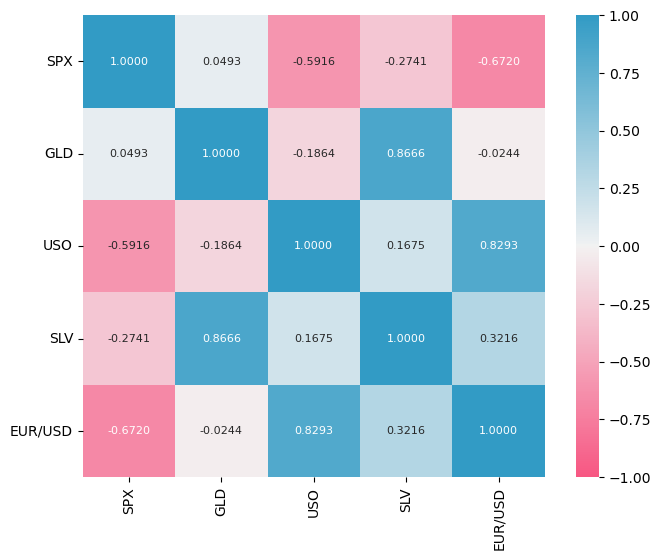

In [25]:
fig, ax = plt.subplots(figsize = (8,6))
cmap = sns.diverging_palette(0,230,90,60, as_cmap=True)
sns.heatmap(correlation, annot=True , annot_kws={'size':8}, square= True, cbar=True, fmt= '.4f', cmap= cmap, vmax=1, vmin=-1)

ax.set_yticklabels( correlation.index, rotation = 0, fontsize = 10);
ax.set_xticklabels( correlation.columns, rotation = 90, fontsize = 10);

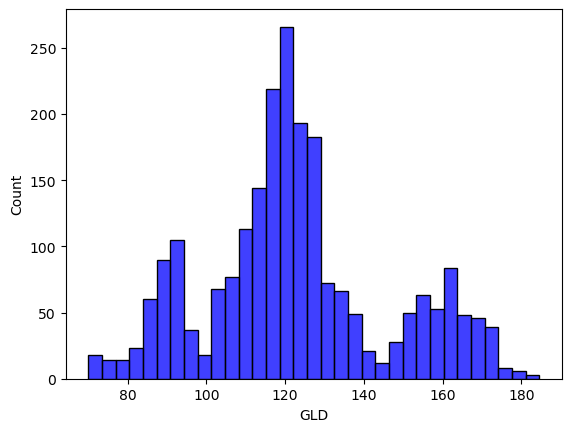

In [28]:
sns.histplot(gold_df['GLD'] ,color ='b');

# Spliting the features

In [30]:
X = gold_df.drop(['Date', 'GLD'], axis=1)
y = gold_df['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model

In [34]:
model = RandomForestRegressor()

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred)

[122.45049969 130.03350323 127.67800026  96.8013976  119.01470054
 114.48499922 124.69260115 117.70779921 108.00970103  98.37249973
  95.19149928 167.67529833 149.48850176 115.80060046 171.09430108
  84.61969965 123.04439873 109.20629747 113.20930088 131.74140283
 124.281899   113.71230093 115.40870072 108.64869979 108.6092017
 125.83419892 119.35239961 112.20529966 113.5597016  125.64319919
 146.33820145  89.54750013 167.53609972 113.59779952 108.45270073
 120.14350099 141.56599751 161.50060145 174.1048985  153.08900111
 119.52210119 113.37760086 121.34609967 113.77609948 122.03400018
 107.95090058  88.61289913 114.39559943 129.83680245 117.91840092
 103.43990022 129.87720268 107.24569848 160.93410284 131.9385999
 117.56469949 147.10780097 135.27280263  95.52470129 124.64030136
 115.0539986   86.12100088 104.27359898 113.93590046  84.16359931
 122.28200019 116.5196991  113.43610191 164.87580321  92.41280008
  80.03920108 161.14560019 159.04740341 106.54249971 150.68490063
 109.7026973

In [45]:
error_score = r2_score(y_test, y_pred)
print("R squared score:",  error_score) 

R squared score: 0.9900393723595634


In [52]:
y_test = np.asarray(y_test)

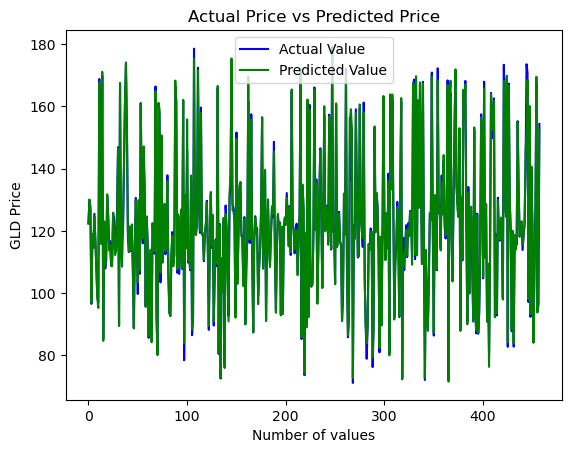

In [53]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(y_pred, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

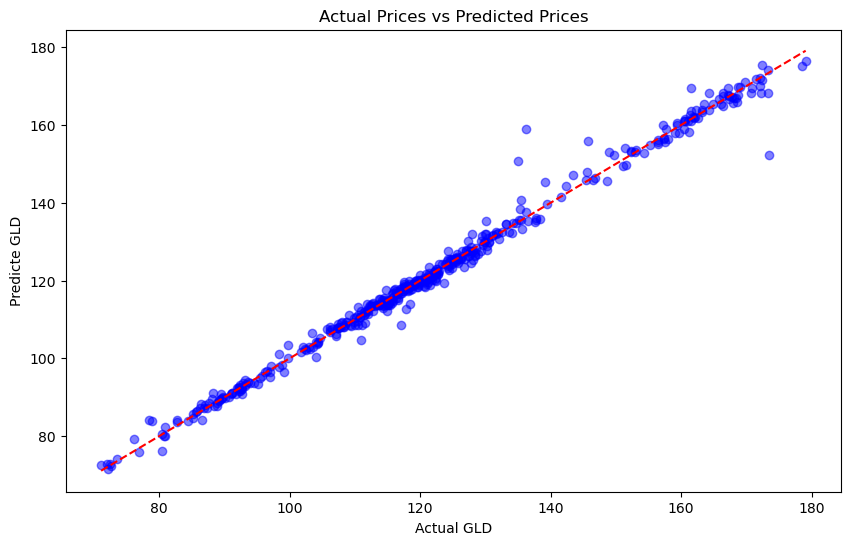

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  
plt.xlabel('Actual GLD')
plt.ylabel('Predicte GLD')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()